<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# TimML Notebook 1
## A well in uniform flow in a multi-layer aquifer
*Developed by Mark Bakker*

Consider a well in the middle aquifer of a three aquifer system. Aquifer properties are given in Table 1. The well is located at $(x,y)=(0,0)$, the discharge is $Q=10,000$ m$^3$/d, and the radius is 0.2 m. There is a uniform flow from West to East with a gradient of 0.002. The head is fixed to 20 m at a distance of 10,000 m downstream of the well. 

#### Table 1: Aquifer data
|             |$k$ (m/d)|$z_b$ (m)|$z_t$|$c$ (days)|
|-------------|--------:|--------:|----:|---------:|
|Aquifer 0    |    10   |   -20   |  0  |          |
|Leaky Layer 1|         |   -40   | -20 |  4000    |   
|Aquifer 1    |    20   |   -80   | -40 |          |
|Leaky Layer 2|         |   -90   | -80 |  10000   | 
|Aquifer 2    |     5   |   -140  | -90 |          ||


Import `timml`, `pylab`, and specify figures to be in the notebook

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

Define model and call it `ml`, add a well, a constant, and uniform flow. Solve the model

In [2]:
ml = Model(k=[10, 20, 5],
           zb=[-20, -80, -140], 
           zt=[0, -40, -90], 
           c=[4000, 10000] )
w = Well(ml, xw=0, yw=0, Qw=10000, rw=0.2, layers=1 )
Constant(ml, xr=10000, yr=0, head=20, layer=0 )
Uflow(ml, grad=0.002, angle=0 )
ml.solve()

Starting solve
Number of elements:  3
Percent progress:  0  
size of matrix (1, 1)
Solution complete


The head at the well in all layers may be computed as

In [3]:
print 'The head at the well is:'
print ml.headVector(w.xw, w.yw)

The head at the well is:
[ 36.67647522  20.06236932  37.57926213]


A contour plot of the head is created for all three aquifers simultaneously. 

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


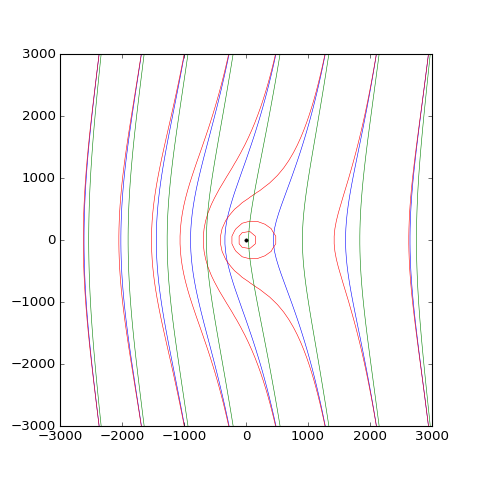

done with contouring
done with contouring
done with contouring


In [4]:
timcontour(ml, -3000, 3000, 50, -3000, 3000, 50, layers=3, levels=10, size=(6,6))

Pathlines are started from $(x,y)=(-2000,-1000)$ at three elevations  $z=-120$, $z=-60$, and $z=-10$; similarly from $(x,y)=(0, 1000)$. A contour plot without any contours is created by specifying `layers=0` and vertical cross-section is added by specifying `xsec=1`. Note that the color of a trace line changes when it enters a different layer. Layer 1 is blue, layer 2 is red, and layer 3 is green. 

grid of (50, 50). gridding in progress. hit ctrl-c to abort


<IPython.core.display.Javascript object>


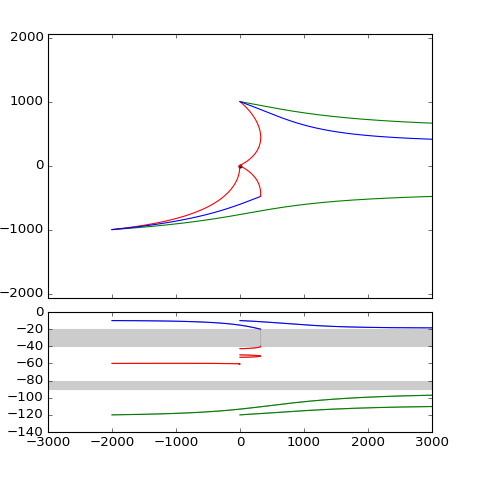

reached maximum number of steps
reached element of type well
reached element of type well
reached maximum number of steps
reached element of type well
reached maximum number of steps


In [5]:
timcontour(ml, -3000, 3000, 50, -3000, 3000,50, layers=0, levels=20, xsec=1, labels=1, size=(6,6))
timtracelines(ml, -2000 * ones(3), -1000 * ones(3), [-120, -60, -10], 50, xsec=1)
timtracelines(ml, 0 * ones(3), 1000 * ones(3), [-120, -50, -10], 50, xsec=1)